In [2]:
# mount Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# import a csv file "united_call_data_dry" in a dataframe using pandas from the folder "Hackathon 2.0 Skyhack from my drive

import pandas as pd

# Install necessary libraries
!pip install gspread gspread_dataframe --quiet

# Import the gspread library
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.auth import default
from google.colab import auth

# Authenticate user
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet by name
spreadsheet = gc.open_by_key("1YxiCP8CHyvBmrh8Q1cqfe0Vb6PzYFawkZNmyExzpN_g")  # Replace with your spreadsheet id

# Get the first sheet
worksheet = spreadsheet.get_worksheet(0) # If it's the first sheet

# Read the data into a pandas DataFrame
df = get_as_dataframe(worksheet)
# Select only the first 12 columns
df = df.iloc[:, :12]

print(df.head())

      call_id  customer_id  agent_id call_start_datetime call_start_time  \
0  4667960400   2033123310    963118     7/31/2024 23:56           23:56   
1  1122072124   8186702651    519057     7/31/2024 23:59         0:03:00   
2  6834291559   2416856629    158319     08-01-2024 0:03           23:59   
3  2266439882   1154544516    488324     08-01-2024 0:04         0:05:00   
4  1211603231   5214456437    721730     08-01-2024 0:05         0:04:00   

  agent_assigned_datetime call_assign_time call_end_datetime call_end_time  \
0         08-01-2024 0:00          0:03:00   08-01-2024 0:00       0:34:00   
1         08-01-2024 0:00          0:06:00   08-01-2024 0:00       0:18:00   
2         08-01-2024 0:00          0:07:00   08-01-2024 0:00       0:26:00   
3         08-01-2024 0:00          0:10:00   08-01-2024 0:00       0:17:00   
4         08-01-2024 0:00          0:14:00   08-01-2024 0:00       0:23:00   

  Handling_time     call_id.1 primary_call_reason  
0        =I2-G2  4.667

In [4]:
# Convert them to datetime objects if they are not already
df['call_start_time'] = pd.to_datetime(df['call_start_time'])
df['call_assign_time'] = pd.to_datetime(df['call_assign_time'])
df['call_end_time'] = pd.to_datetime(df['call_end_time'])
# Calculate waiting time
df['waiting_time'] = (df['call_assign_time'] - df['call_start_time'])
df['handler_time'] = (df['call_end_time'] - df['call_assign_time'])
print(df.head())


<ipython-input-4-86d00787719f>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['call_start_time'] = pd.to_datetime(df['call_start_time'])
<ipython-input-4-86d00787719f>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['call_assign_time'] = pd.to_datetime(df['call_assign_time'])
<ipython-input-4-86d00787719f>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['call_end_time'] = pd.to_datetime(df['call_end_time'])


      call_id  customer_id  agent_id call_start_datetime     call_start_time  \
0  4667960400   2033123310    963118     7/31/2024 23:56 2024-10-09 23:56:00   
1  1122072124   8186702651    519057     7/31/2024 23:59 2024-10-09 00:03:00   
2  6834291559   2416856629    158319     08-01-2024 0:03 2024-10-09 23:59:00   
3  2266439882   1154544516    488324     08-01-2024 0:04 2024-10-09 00:05:00   
4  1211603231   5214456437    721730     08-01-2024 0:05 2024-10-09 00:04:00   

  agent_assigned_datetime    call_assign_time call_end_datetime  \
0         08-01-2024 0:00 2024-10-09 00:03:00   08-01-2024 0:00   
1         08-01-2024 0:00 2024-10-09 00:06:00   08-01-2024 0:00   
2         08-01-2024 0:00 2024-10-09 00:07:00   08-01-2024 0:00   
3         08-01-2024 0:00 2024-10-09 00:10:00   08-01-2024 0:00   
4         08-01-2024 0:00 2024-10-09 00:14:00   08-01-2024 0:00   

        call_end_time Handling_time     call_id.1 primary_call_reason  \
0 2024-10-09 00:34:00        =I2-G2  4.6679

In [5]:
# Calculate mean, median, and mode for waiting time and handling time
waiting_time_mean = df['waiting_time'].mean()
waiting_time_median = df['waiting_time'].median()
waiting_time_mode = df['waiting_time'].mode()[0] if not df['waiting_time'].mode().empty else "No mode"

handler_time_mean = df['handler_time'].mean()
handler_time_median = df['handler_time'].median()
handler_time_mode = df['handler_time'].mode()[0] if not df['handler_time'].mode().empty else "No mode"

print("Waiting Time:")
print(f"Mean: {waiting_time_mean}")
print(f"Median: {waiting_time_median}")
print(f"Mode: {waiting_time_mode}")

print("\nHandler Time:")
print(f"Mean: {handler_time_mean}")
print(f"Median: {handler_time_median}")
print(f"Mode: {handler_time_mode}")


Waiting Time:
Mean: 0 days 00:04:44.264308592
Median: 0 days 00:07:00
Mode: 0 days 00:10:00

Handler Time:
Mean: 0 days 00:06:51.896114747
Median: 0 days 00:07:00
Mode: 0 days 00:03:00


In [6]:
df['waiting_time_str'] = df['waiting_time'].astype(str)
df['handler_time_str'] = df['handler_time'].astype(str)

print(df.head())


      call_id  customer_id  agent_id call_start_datetime     call_start_time  \
0  4667960400   2033123310    963118     7/31/2024 23:56 2024-10-09 23:56:00   
1  1122072124   8186702651    519057     7/31/2024 23:59 2024-10-09 00:03:00   
2  6834291559   2416856629    158319     08-01-2024 0:03 2024-10-09 23:59:00   
3  2266439882   1154544516    488324     08-01-2024 0:04 2024-10-09 00:05:00   
4  1211603231   5214456437    721730     08-01-2024 0:05 2024-10-09 00:04:00   

  agent_assigned_datetime    call_assign_time call_end_datetime  \
0         08-01-2024 0:00 2024-10-09 00:03:00   08-01-2024 0:00   
1         08-01-2024 0:00 2024-10-09 00:06:00   08-01-2024 0:00   
2         08-01-2024 0:00 2024-10-09 00:07:00   08-01-2024 0:00   
3         08-01-2024 0:00 2024-10-09 00:10:00   08-01-2024 0:00   
4         08-01-2024 0:00 2024-10-09 00:14:00   08-01-2024 0:00   

        call_end_time Handling_time     call_id.1 primary_call_reason  \
0 2024-10-09 00:34:00        =I2-G2  4.6679

In [7]:
# Count the number of rows where 'waiting_time_str' contains '-1 days'
count = df['waiting_time_str'].str.contains('-1 days').sum()
count = df['handler_time_str'].str.contains('-1 days').sum()
print(f"Number of rows with '-1 days' in 'waiting_time_str': {count}")
print(f"Number of rows with '-1 days' in 'handler_time_str': {count}")

Number of rows with '-1 days' in 'waiting_time_str': 237
Number of rows with '-1 days' in 'handler_time_str': 237


In [8]:
# Extract the last 5 characters of the 'waiting_time_str' and 'handler_time_str' columns
# To deal with date-time special data type
df['waiting_time_str'] = df['waiting_time_str'].str[-5:]
df['handler_time_str'] = df['handler_time_str'].str[-5:]


columns_to_drop = ['waiting_time_r', 'handler_time_r', 'last_5_handler_time','last_5_waiting_time' ]
df = df.drop(columns=columns_to_drop, errors='ignore')

print(df.head())


      call_id  customer_id  agent_id call_start_datetime     call_start_time  \
0  4667960400   2033123310    963118     7/31/2024 23:56 2024-10-09 23:56:00   
1  1122072124   8186702651    519057     7/31/2024 23:59 2024-10-09 00:03:00   
2  6834291559   2416856629    158319     08-01-2024 0:03 2024-10-09 23:59:00   
3  2266439882   1154544516    488324     08-01-2024 0:04 2024-10-09 00:05:00   
4  1211603231   5214456437    721730     08-01-2024 0:05 2024-10-09 00:04:00   

  agent_assigned_datetime    call_assign_time call_end_datetime  \
0         08-01-2024 0:00 2024-10-09 00:03:00   08-01-2024 0:00   
1         08-01-2024 0:00 2024-10-09 00:06:00   08-01-2024 0:00   
2         08-01-2024 0:00 2024-10-09 00:07:00   08-01-2024 0:00   
3         08-01-2024 0:00 2024-10-09 00:10:00   08-01-2024 0:00   
4         08-01-2024 0:00 2024-10-09 00:14:00   08-01-2024 0:00   

        call_end_time Handling_time     call_id.1 primary_call_reason  \
0 2024-10-09 00:34:00        =I2-G2  4.6679

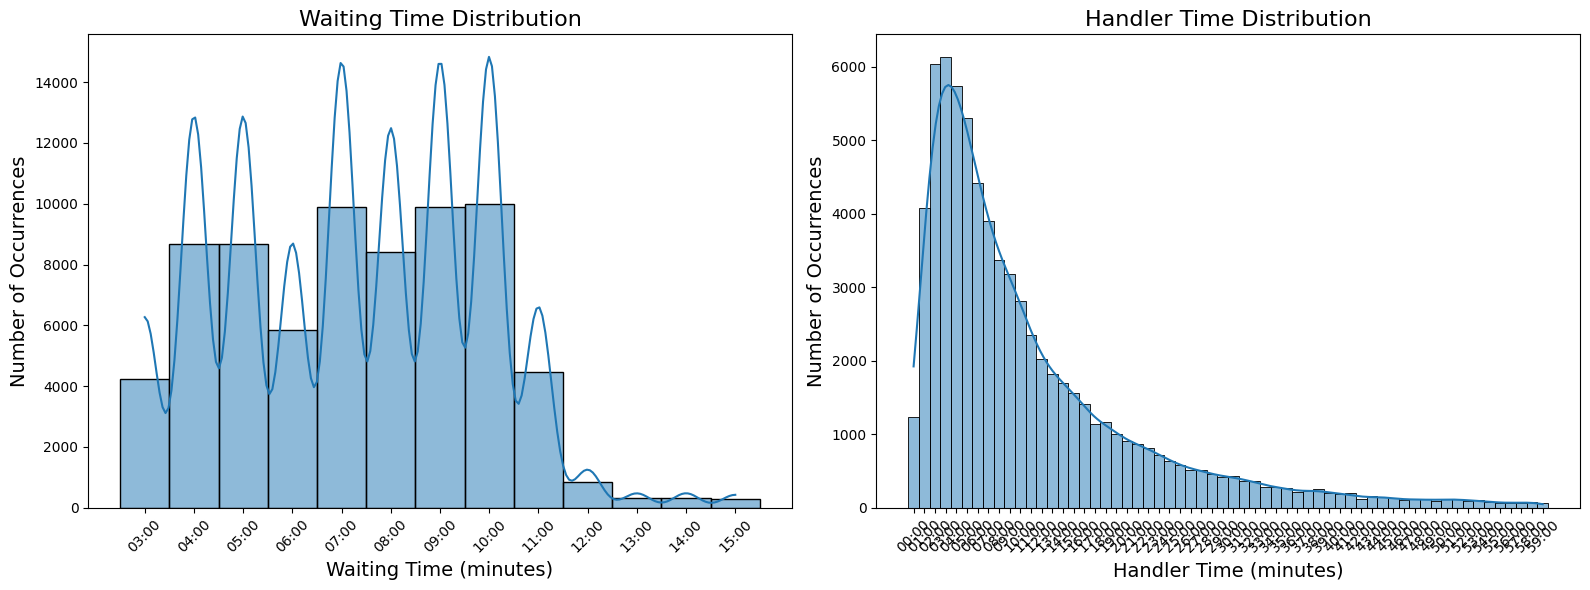

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'waiting_time_str' and 'handler_time_str'
df = df.sort_values(by=['waiting_time_str', 'handler_time_str'])

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the waiting time in the first subplot
sns.histplot(df['waiting_time_str'], bins=30, kde=True, ax=ax[0])
ax[0].set_xlabel('Waiting Time (Seconds)', fontsize=14)
ax[0].set_ylabel('Number of Occurrences', fontsize=14)
ax[0].set_title('Waiting Time Distribution', fontsize=16)

# Rotate x-axis labels in the first subplot
ax[0].tick_params(axis='x', rotation=45)

# Plot the handler time in the second subplot
sns.histplot(df['handler_time_str'], bins=30, kde=True, ax=ax[1])
ax[1].set_xlabel('Handler Time (Seconds)', fontsize=14)
ax[1].set_ylabel('Number of Occurrences', fontsize=14)
ax[1].set_title('Handler Time Distribution', fontsize=16)

# Rotate x-axis labels in the second subplot
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# Open the Google Sheet by name
spreadsheet = gc.open_by_key("1pw7eay1TishlVJja9z796dn-IJD_UbLDba0OoYASbao")  # Replace with your spreadsheet id

# Get the first sheet
worksheet = spreadsheet.get_worksheet(0) # If it's the first sheet

# Read the data into a pandas DataFrame
dr = get_as_dataframe(worksheet)
# Select only the first 2 columns
dr = dr.iloc[:, :2]

print(dr.head())

        call_id primary_call_reason
0  4.667960e+09   Voluntary  Cancel
1  1.122072e+09             Booking
2  6.834292e+09              IRROPS
3  2.266440e+09             Upgrade
4  1.211603e+09             Seating


In [12]:
# prompt: Group the same reasons ignoring the white space written in the same names

# Replace whitespace with no space in the 'primary_call_reason' column
dr['primary_call_reason'] = dr['primary_call_reason'].str.replace(' ', '')

# Classify the primary call reason and count for each reason
reason_counts = dr.groupby('primary_call_reason')['primary_call_reason'].count()
print(reason_counts)


primary_call_reason
Baggage                 2832
Booking                 2637
CheckIn                 1904
Checkout                1888
Communications          3840
DigitalSupport          1225
Disability               403
ETC                      952
IRROPS                 13311
MileagePlus             5851
OtherTopics              818
PostFlight              4330
ProductsandServices     3332
ScheduleChange           731
Seating                 6365
TravelerUpdates          937
UnaccompaniedMinor       104
Upgrade                 2738
VoluntaryCancel         1607
VoluntaryChange        10848
Name: primary_call_reason, dtype: int64


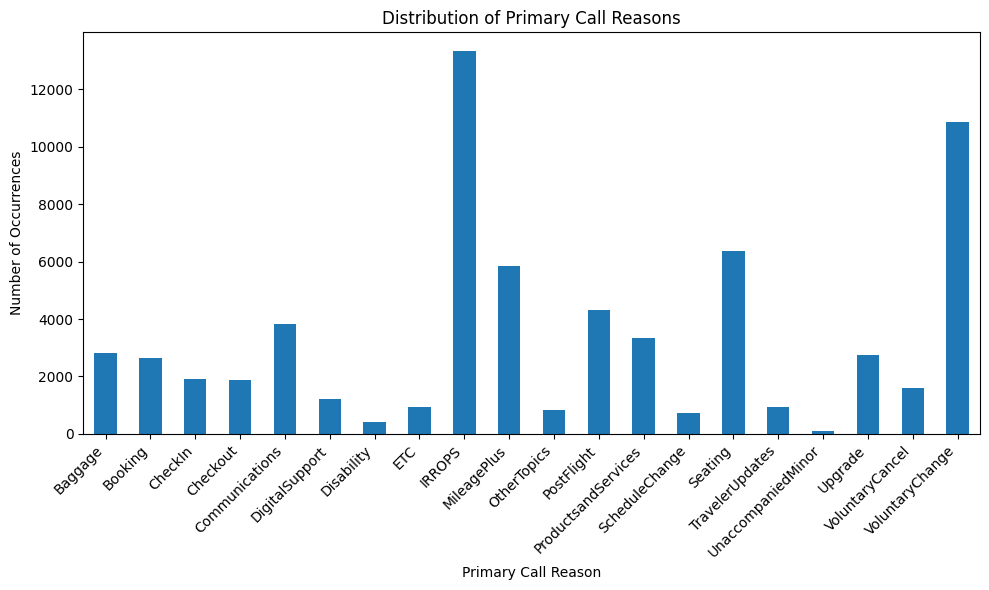

In [13]:
# prompt: plot a graph for primary call reasons and the no. of times they occur

import matplotlib.pyplot as plt

# Assuming 'reason_counts' is the pandas Series containing the counts for each reason
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
reason_counts.plot(kind='bar')
plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Primary Call Reasons')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [14]:
# Open the Google Sheet by name
spreadsheet = gc.open_by_key("1ACBxiHXCH1BbtRLm9O-sUYmYOa9q-56NSIQWKEEXRKc")  # Replace with your spreadsheet id

# Get the first sheet
worksheet = spreadsheet.get_worksheet(0) # If it's the first sheet

# Read the data into a pandas DataFrame
ds = get_as_dataframe(worksheet)
# Select only the first 2 columns
ds = ds.iloc[:, :6]

print(ds.head())

        call_id  agent_id agent_tone customer_tone  average_sentiment  \
0  3.311768e+09  963118.0    neutral    frustrated               0.00   
1  9.159621e+08  878048.0       calm         angry               0.04   
2  6.761810e+09  153460.0    neutral    frustrated               0.00   
3  7.841630e+09  915618.0    neutral    frustrated              -0.10   
4  9.042145e+09  922729.0    neutral          calm              -0.11   

   silence_percent_average  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  


agent_tone
angry           389
calm          24675
frustrated     3684
neutral       42758
polite           87
Name: agent_tone, dtype: int64 

customer_tone
angry         14408
calm          14347
frustrated    14240
neutral       14444
polite        14371
Name: customer_tone, dtype: int64


<ipython-input-15-150d89639448>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='agent_tone', y='count', data=sentiments_counts_agent_df, ax=ax[0], palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Future

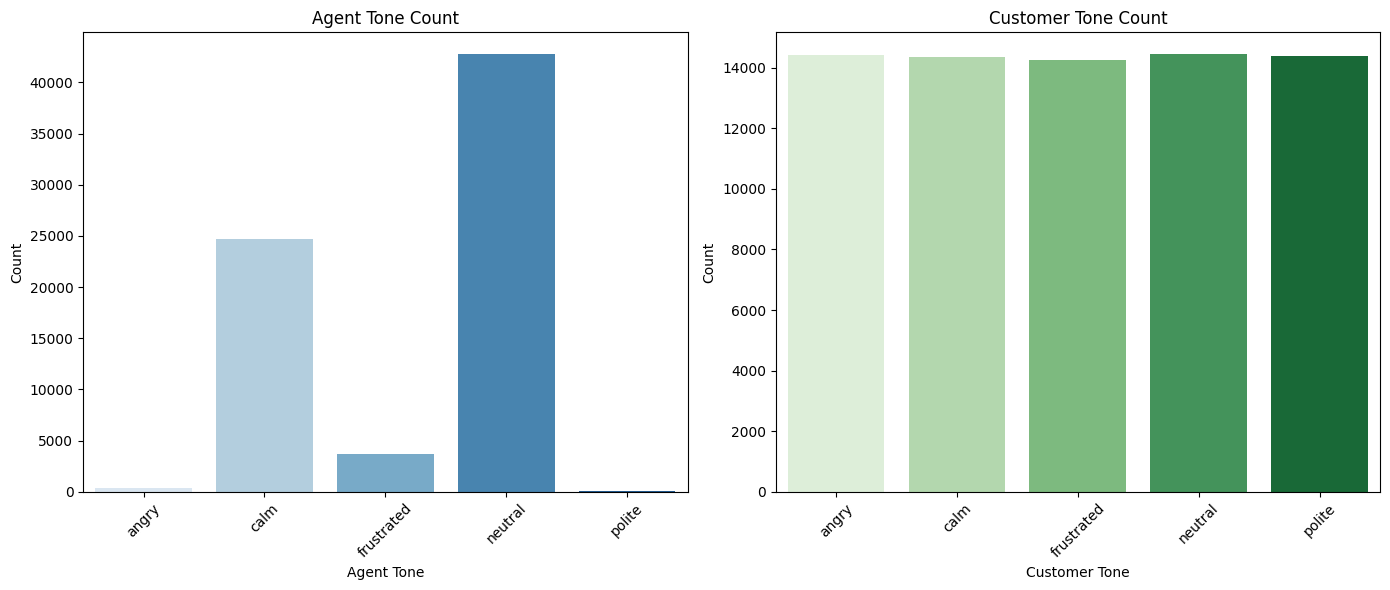

In [15]:
# Classify the agent tone and count for each sentiment, and customer tone and count
sentiments_counts_agent = ds.groupby('agent_tone')['agent_tone'].count()
sentiments_counts_customer = ds.groupby('customer_tone')['customer_tone'].count()
print(sentiments_counts_agent, '\n')
print(sentiments_counts_customer)

# Convert the Series to DataFrame for easy plotting
sentiments_counts_agent_df = sentiments_counts_agent.reset_index(name='count')
sentiments_counts_customer_df = sentiments_counts_customer.reset_index(name='count')

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Adjust the figure size as needed

# Plot the agent tone counts
sns.barplot(x='agent_tone', y='count', data=sentiments_counts_agent_df, ax=ax[0], palette='Blues')
ax[0].set_xlabel('Agent Tone')
ax[0].set_ylabel('Count')
ax[0].set_title('Agent Tone Count')
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot the customer tone counts
sns.barplot(x='customer_tone', y='count', data=sentiments_counts_customer_df, ax=ax[1], palette='Greens')
ax[1].set_xlabel('Customer Tone')
ax[1].set_ylabel('Count')
ax[1].set_title('Customer Tone Count')
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Show the plots
plt.show()

In [16]:

# Round off the values in 'silence_percent_average' and 'average_sentiment' to one decimal place
ds['silence_percent_average'] = ds['silence_percent_average'].round(1)
ds['average_sentiment'] = ds['average_sentiment'].round(1)

print(ds.head())


        call_id  agent_id agent_tone customer_tone  average_sentiment  \
0  3.311768e+09  963118.0    neutral    frustrated                0.0   
1  9.159621e+08  878048.0       calm         angry                0.0   
2  6.761810e+09  153460.0    neutral    frustrated                0.0   
3  7.841630e+09  915618.0    neutral    frustrated               -0.1   
4  9.042145e+09  922729.0    neutral          calm               -0.1   

   silence_percent_average  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  


<ipython-input-17-9a1ea2e87687>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-17-9a1ea2e87687>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')


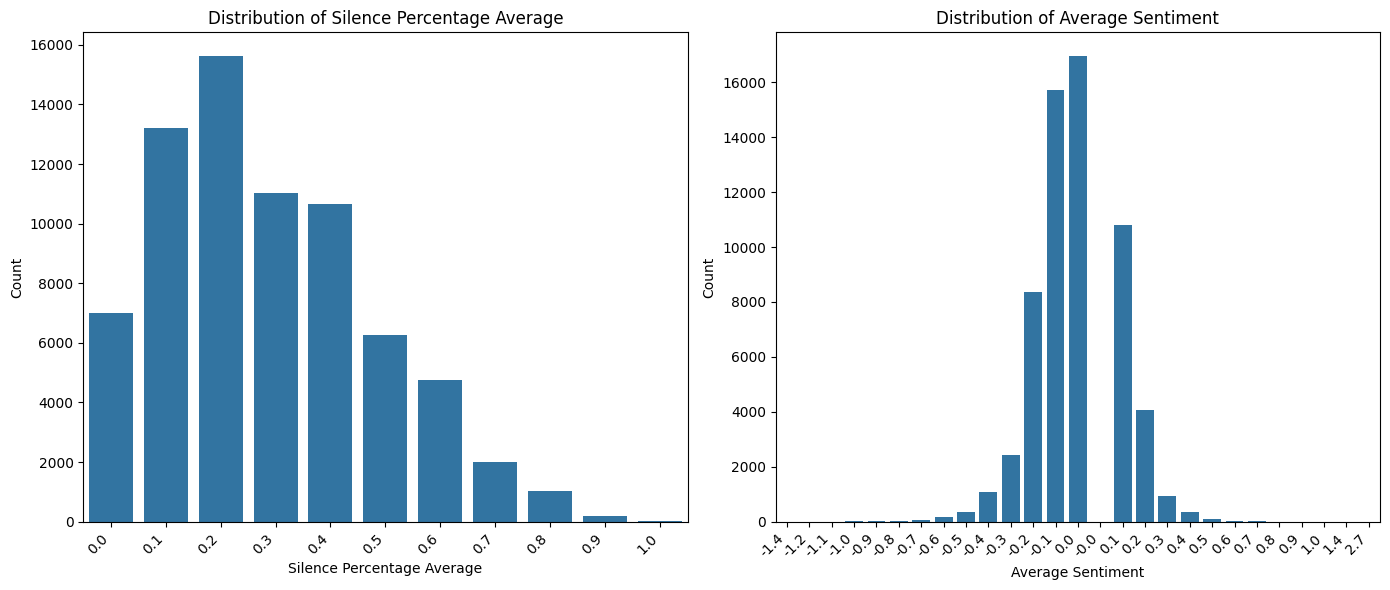

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the count for each unique value in 'silence_percent_average'
silence_counts = ds.groupby('silence_percent_average')['silence_percent_average'].count()
av_sentiment_counts = ds.groupby('average_sentiment')['average_sentiment'].count()

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Adjust the figure size as needed

# Plot the silence percentage average
sns.countplot(x='silence_percent_average', data=ds, ax=ax[0])
ax[0].set_xlabel('Silence Percentage Average')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Silence Percentage Average')

# Rotate x-axis labels in the first subplot
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Plot the average sentiment
sns.countplot(x='average_sentiment', data=ds, ax=ax[1])
ax[1].set_xlabel('Average Sentiment')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Average Sentiment')

# Rotate x-axis labels in the second subplot
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Show the plots
plt.show()


In [18]:
import pandas as pd

# Filter the dataset for rows where agent tone is 'anger' or 'frustration'
filtered_tones = ds[ds['agent_tone'].isin(['angry', 'frustrated'])]

# Count occurrences of 'anger' and 'frustration' for each agent
anger_counts = filtered_tones[filtered_tones['agent_tone'] == 'angry'].groupby('agent_id').size().reset_index(name='anger_count')
frustration_counts = filtered_tones[filtered_tones['agent_tone'] == 'frustrated'].groupby('agent_id').size().reset_index(name='frustration_count')

# Merge the two counts into a single DataFrame
merged_counts = pd.merge(anger_counts, frustration_counts, on='agent_id', how='outer').fillna(0)

# Convert counts to integers
merged_counts['anger_count'] = merged_counts['anger_count'].astype(int)
merged_counts['frustration_count'] = merged_counts['frustration_count'].astype(int)

# Sort by the sum of anger and frustration counts in descending order
merged_counts['total_count'] = merged_counts['anger_count'] + merged_counts['frustration_count']
merged_counts_sorted = merged_counts.sort_values(by='total_count', ascending=False).drop(columns='total_count')

# Display the final table
print("Table of agents with counts of 'anger' and 'frustration':")
print(merged_counts_sorted)


Table of agents with counts of 'anger' and 'frustration':
     agent_id  anger_count  frustration_count
321  963118.0            3                 41
172  594957.0            3                 33
292  882260.0            4                 31
141  519057.0            3                 31
310  931734.0            2                 31
..        ...          ...                ...
40   229129.0            0                  1
262  814757.0            0                  1
143  519791.0            0                  1
275  835959.0            0                  1
226  730111.0            0                  1

[335 rows x 3 columns]


In [19]:
# prompt: find maximum value of anger_count from merged_counts_sorted

max_anger_count = merged_counts_sorted['anger_count'].max()
print(f"Maximum anger count: {max_anger_count}")

max_fru_count = merged_counts_sorted['frustration_count'].max()
print(f"Maximum Frustration count: {max_fru_count}")


Maximum anger count: 6
Maximum Frustration count: 41


In [20]:
import pandas as pd

# Filter the dataset for rows where customer tone is either 'calm' or 'polite'
# and agent tone is 'angry' or 'frustrated'
filtered_df = ds[(ds['customer_tone'].isin(['calm', 'polite'])) &
                  (ds['agent_tone'].isin(['angry', 'frustrated']))]

# Sort the filtered DataFrame by 'agent_tone' in descending order
sorted_df = filtered_df.sort_values(by=['agent_tone'], ascending=False)

# Count occurrences of each agent_id in the sorted DataFrame
agent_counts = sorted_df['agent_id'].value_counts()
print(type(agent_counts))
# Filter for agents who appear more than 3 times

frequent_agents = agent_counts[agent_counts > 3].index.tolist()
print(frequent_agents, agent_counts)

# Filter the sorted DataFrame for these frequent agents
#final_df = sorted_df[sorted_df['agent_id'].isin(frequent_agents)]



<class 'pandas.core.series.Series'>
[963118.0, 519057.0, 594957.0, 293576.0, 784648.0, 882260.0, 192245.0, 931734.0, 878048.0, 542034.0, 825827.0, 429743.0, 126555.0, 131036.0, 208992.0, 600666.0, 524049.0, 347606.0, 633922.0, 479098.0, 965878.0, 250675.0, 607742.0, 696555.0, 860774.0, 251287.0, 414690.0, 663804.0, 749671.0, 805825.0, 391052.0, 499403.0, 901589.0, 275034.0, 698596.0, 618490.0, 926550.0, 265196.0, 975590.0, 390819.0, 470395.0, 367706.0, 459044.0, 591324.0, 591778.0, 715813.0, 181820.0, 153460.0, 359050.0, 204674.0, 113217.0, 922729.0, 496568.0, 144120.0, 488324.0, 136010.0, 519294.0, 215457.0, 964561.0, 289402.0, 782403.0, 788537.0, 981776.0, 274746.0, 436472.0, 136855.0, 422969.0, 342345.0, 734708.0, 757349.0, 436160.0, 645129.0, 993862.0, 357288.0, 132311.0, 797276.0, 982131.0, 630891.0, 852493.0, 305039.0, 263480.0, 266799.0, 910145.0, 575131.0, 968346.0, 308266.0, 640550.0, 149315.0, 696673.0, 176703.0, 819946.0, 717526.0, 686999.0, 719115.0, 171021.0, 828869.0, 901

In [21]:
spreadsheet = gc.open_by_key("1tamaSjtljm1zJ6SyURBbAh3FVaUYWHQlAkiCBMMgbUo")

# Get the first worksheet (index 0)
worksheet = spreadsheet.get_worksheet(0)

# Read all data into a list of lists
data = worksheet.get_all_values()

# Convert to a pandas DataFrame
dc = pd.DataFrame(data)

# Select only the first 3 columns
dc = dc.iloc[:, :3]

# Display the first 5 rows
print(dc.head())

             0               1                 2
0  customer_id   customer_name  elite_level_code
1   2033123310  Matthew Foster                 4
2   8186702651   Tammy Walters                  
3   2416856629   Jeffery Dixon                  
4   1154544516   David Wilkins                 2


In [22]:
import pandas as pd

# Assuming the 3rd column contains the 'customer elite level code'
# Rename the column for clarity (optional, adjust index as necessary)
dc.columns = ['Customer ID', 'Customer Name', 'Elite Level Code']  # Adjust column names as needed

# Sort the DataFrame by the 'Elite Level Code' column
sorted_dc = dc.sort_values(by='Elite Level Code')

# Display the sorted DataFrame
print(sorted_dc)


       Customer ID      Customer Name  Elite Level Code
35905   2616370650          Max Combs                  
20912   6285296534     Belinda Nelson                  
48064   9652849772   Jesus Richardson                  
20909    677442762        Mary Flores                  
20908   6798913141  Barbara Contreras                  
...            ...                ...               ...
15906   6734579363    Benjamin Mccall                 5
15905   6891622330     Tiffany Mccall                 5
15899    722229097  Matthew Brooks MD                 5
35043   1232689574      Laura Griffin                 5
0      customer_id      customer_name  elite_level_code

[71811 rows x 3 columns]


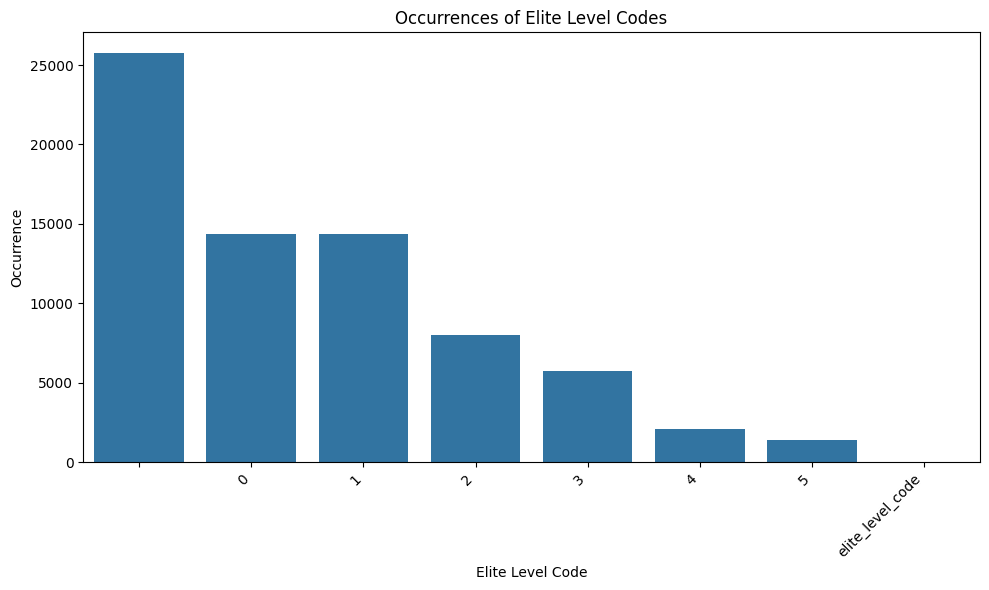

In [23]:
# Count the occurrences of each elite level code
elite_counts = sorted_dc.groupby('Elite Level Code')['Elite Level Code'].count()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Elite Level Code', data=sorted_dc)
plt.xlabel('Elite Level Code')
plt.ylabel('Occurrence')
plt.title('Occurrences of Elite Level Codes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [24]:
# Open the Google Sheet by name
spreadsheet = gc.open_by_key("1YxiCP8CHyvBmrh8Q1cqfe0Vb6PzYFawkZNmyExzpN_g")  # Replace with your spreadsheet id

# Get the first sheet
worksheet = spreadsheet.get_worksheet(0) # If it's the first sheet

# Read the data into a pandas DataFrame
dfinal = get_as_dataframe(worksheet)
# Select only the first 2 columns
dfinal = dfinal.iloc[:, :12]

print(dfinal.head())

      call_id  customer_id  agent_id call_start_datetime call_start_time  \
0  4667960400   2033123310    963118     7/31/2024 23:56           23:56   
1  1122072124   8186702651    519057     7/31/2024 23:59         0:03:00   
2  6834291559   2416856629    158319     08-01-2024 0:03           23:59   
3  2266439882   1154544516    488324     08-01-2024 0:04         0:05:00   
4  1211603231   5214456437    721730     08-01-2024 0:05         0:04:00   

  agent_assigned_datetime call_assign_time call_end_datetime call_end_time  \
0         08-01-2024 0:00          0:03:00   08-01-2024 0:00       0:34:00   
1         08-01-2024 0:00          0:06:00   08-01-2024 0:00       0:18:00   
2         08-01-2024 0:00          0:07:00   08-01-2024 0:00       0:26:00   
3         08-01-2024 0:00          0:10:00   08-01-2024 0:00       0:17:00   
4         08-01-2024 0:00          0:14:00   08-01-2024 0:00       0:23:00   

  Handling_time     call_id.1 primary_call_reason  
0        =I2-G2  4.667

In [25]:
import pandas as pd

# Assuming you have already loaded your data into a DataFrame named df
# Load your data here
# df = pd.read_csv('your_file.csv')  # or df = pd.read_excel('your_file.xlsx')

# Merge the data based on call_id from columns 'A' and 'K'
# Assuming 'A' is the caller_id for column J and 'K' is the caller_id for column L
merged_df = df.merge(df[['call_id', 'primary_call_reason']], left_on='call_id', right_on='call_id', how='inner')

# Select only relevant columns for analysis
result_df = merged_df[['Handling_time', 'primary_call_reason_x', 'primary_call_reason_y']]
result_df['Handling_time'] = df['handler_time_str']
result_df['primary_call_reason_x'] = result_df['primary_call_reason_x'].str.replace(' ', '', regex=False)
result_df['primary_call_reason_x'] = result_df['primary_call_reason_x'].str.replace('&', 'and', regex=False)
result_df['primary_call_reason_x'] = result_df['primary_call_reason_x'].str.replace('-', '', regex=False)
result_df['primary_call_reason_y'] = result_df['primary_call_reason_y'].str.replace('-', '', regex=False)
result_df['primary_call_reason_y'] = result_df['primary_call_reason_y'].str.replace(' ', '', regex=False)
result_df['primary_call_reason_y'] = result_df['primary_call_reason_y'].str.replace('&', 'and', regex=False)
# Display the result
print(result_df.head())

# You can now perform further analysis on 'Handling_time' and 'primary_call_reason'


<ipython-input-25-8c0b7a57a521>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Handling_time'] = df['handler_time_str']
<ipython-input-25-8c0b7a57a521>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['primary_call_reason_x'] = result_df['primary_call_reason_x'].str.replace(' ', '', regex=False)
<ipython-input-25-8c0b7a57a521>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

  Handling_time primary_call_reason_x primary_call_reason_y
0         31:00                IRROPS                IRROPS
1         12:00              Checkout              Checkout
2         19:00            PostFlight            PostFlight
3         07:00            PostFlight            PostFlight
4         09:00                IRROPS                IRROPS


<ipython-input-25-8c0b7a57a521>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['primary_call_reason_y'] = result_df['primary_call_reason_y'].str.replace('&', 'and', regex=False)


In [28]:
# prompt: from dfinal['primary_call_reason'] remove white spaces from the column elements
dfinal['primary_call_reason'] = dfinal['primary_call_reason'].str.replace(' ', '', regex=False)
dfinal['primary_call_reason'] = dfinal['primary_call_reason'].str.replace('&', 'and', regex=False)
dfinal['primary_call_reason'] = dfinal['primary_call_reason'].str.replace('-', '', regex=False)
print(dfinal.head())


      call_id  customer_id  agent_id call_start_datetime call_start_time  \
0  4667960400   2033123310    963118     7/31/2024 23:56           23:56   
1  1122072124   8186702651    519057     7/31/2024 23:59         0:03:00   
2  6834291559   2416856629    158319     08-01-2024 0:03           23:59   
3  2266439882   1154544516    488324     08-01-2024 0:04         0:05:00   
4  1211603231   5214456437    721730     08-01-2024 0:05         0:04:00   

  agent_assigned_datetime call_assign_time call_end_datetime call_end_time  \
0         08-01-2024 0:00          0:03:00   08-01-2024 0:00       0:34:00   
1         08-01-2024 0:00          0:06:00   08-01-2024 0:00       0:18:00   
2         08-01-2024 0:00          0:07:00   08-01-2024 0:00       0:26:00   
3         08-01-2024 0:00          0:10:00   08-01-2024 0:00       0:17:00   
4         08-01-2024 0:00          0:14:00   08-01-2024 0:00       0:23:00   

  Handling_time     call_id.1 primary_call_reason  
0        =I2-G2  4.667

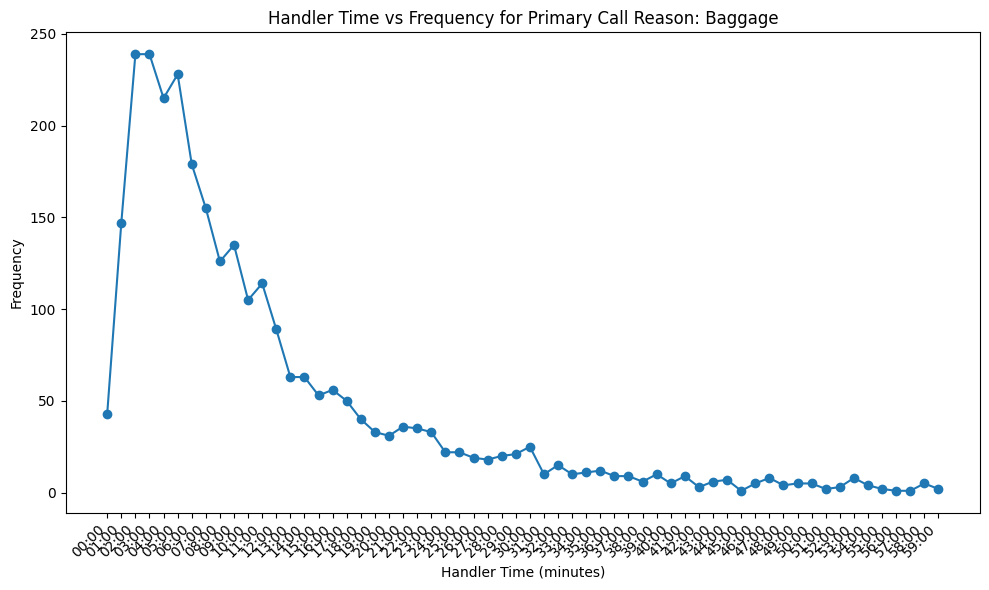

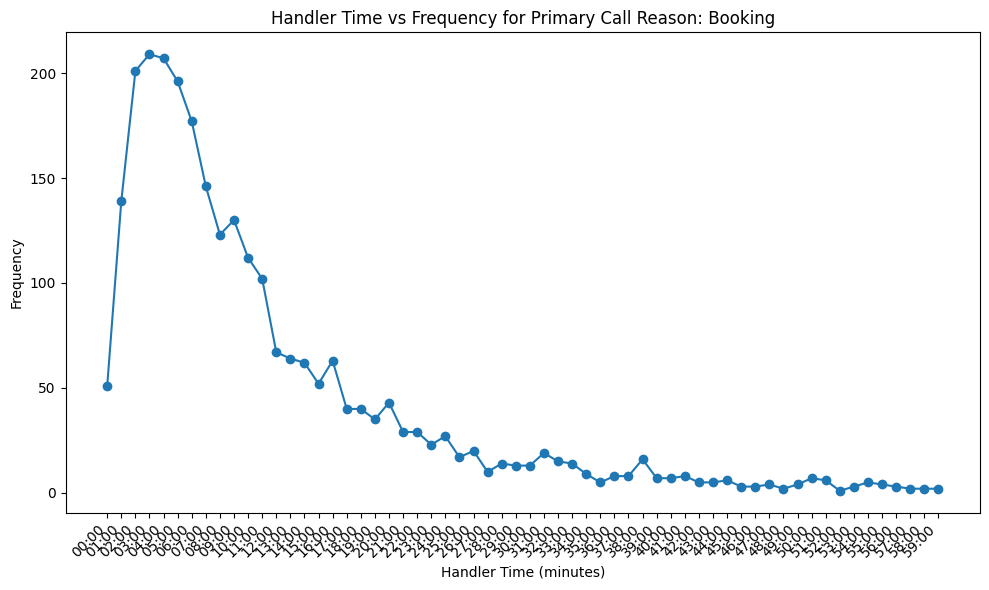

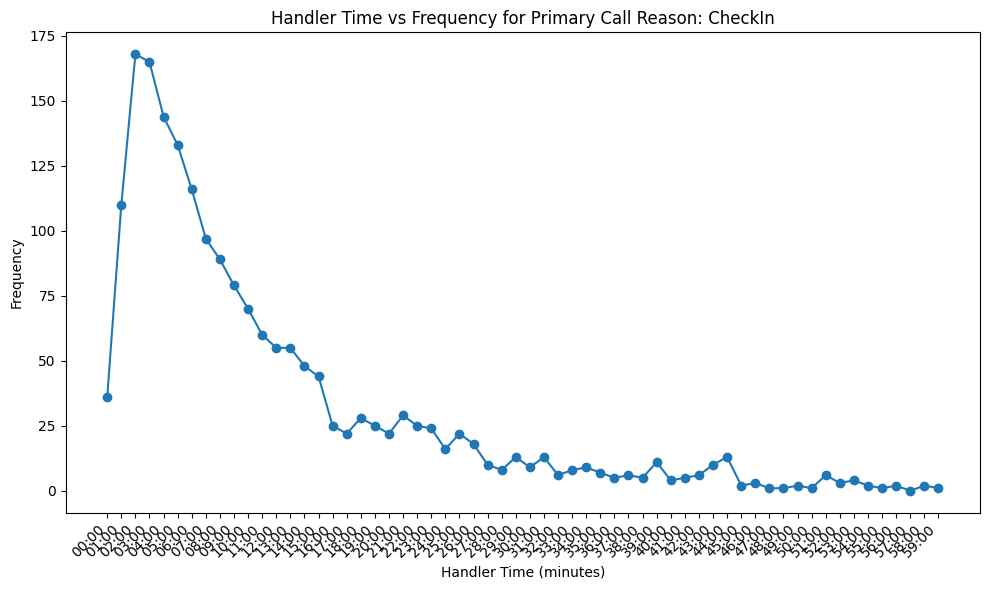

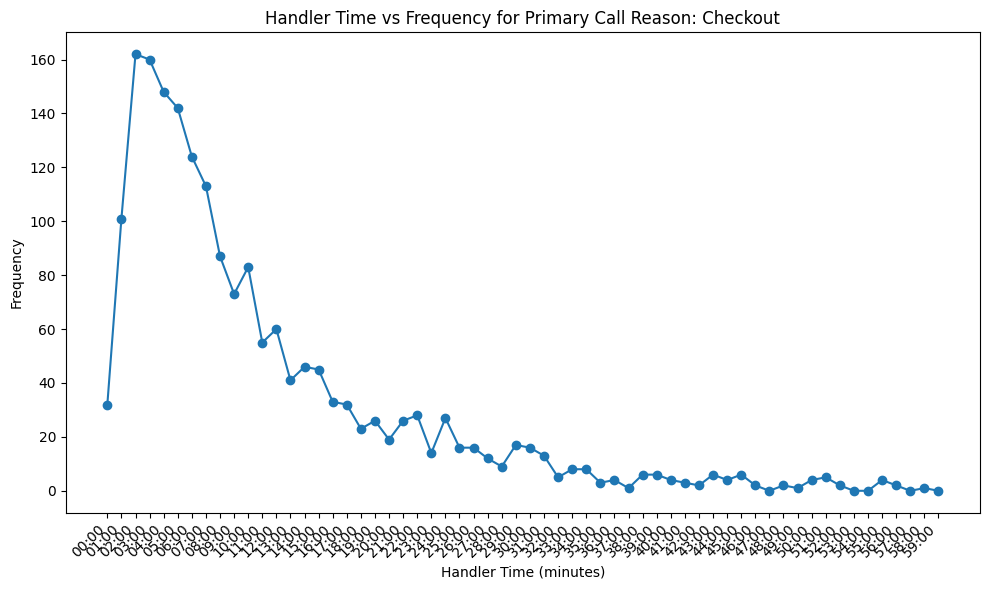

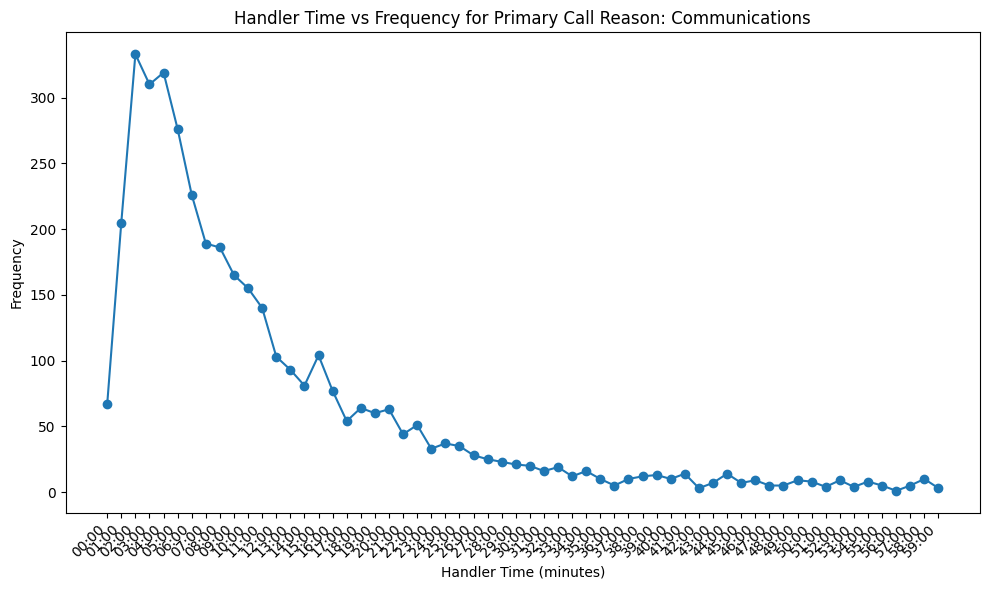

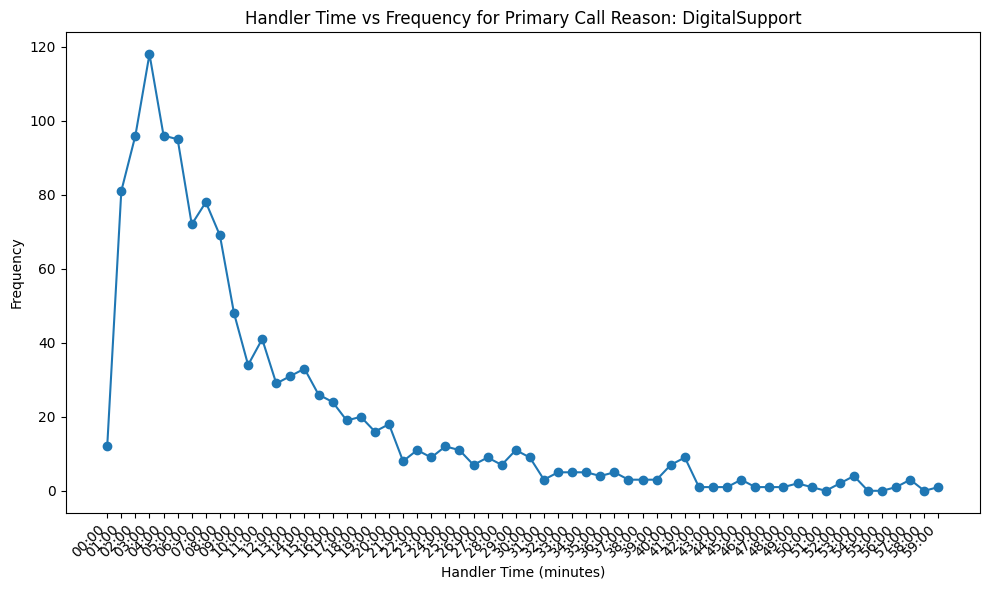

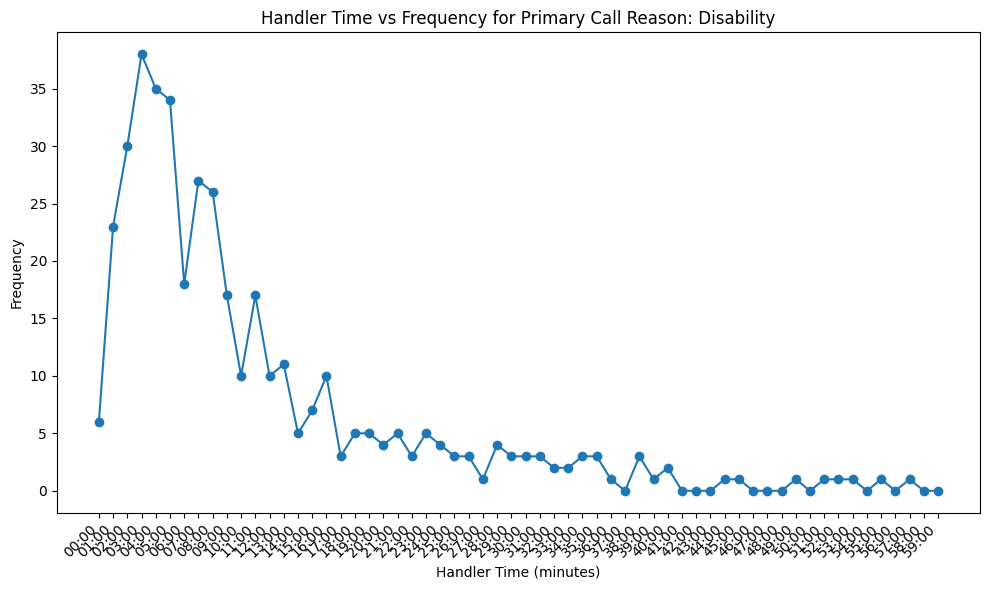

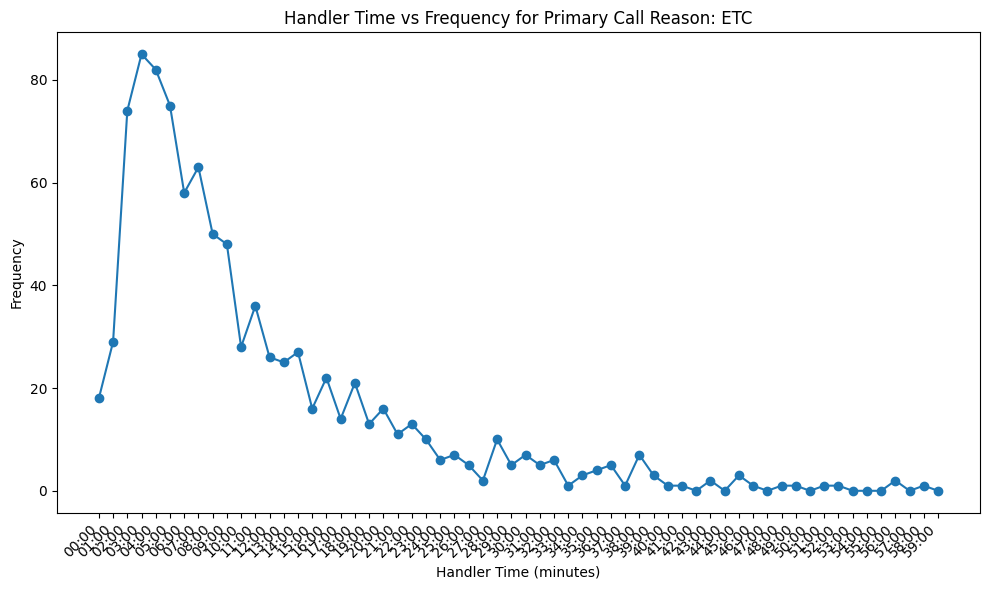

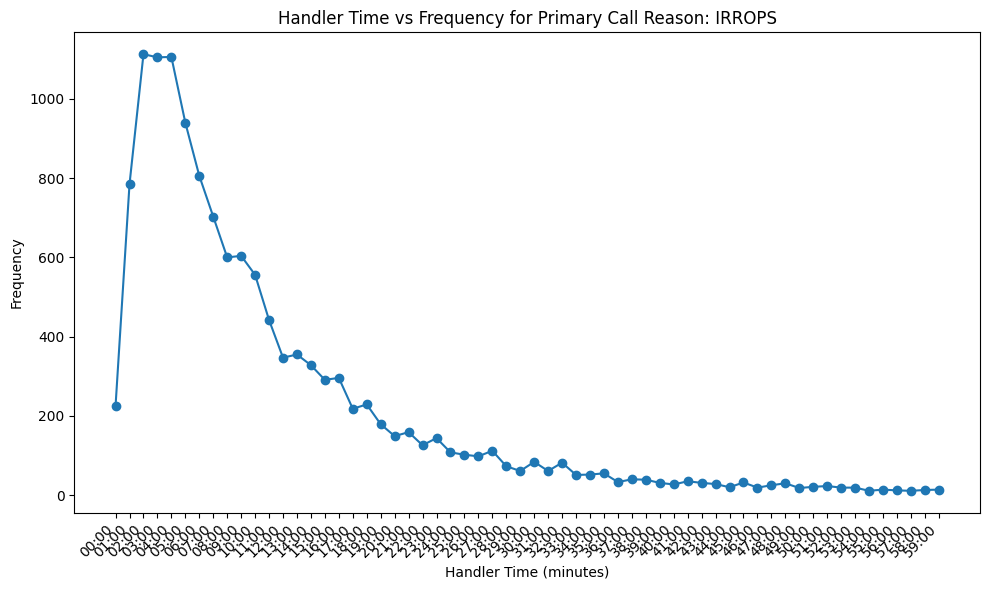

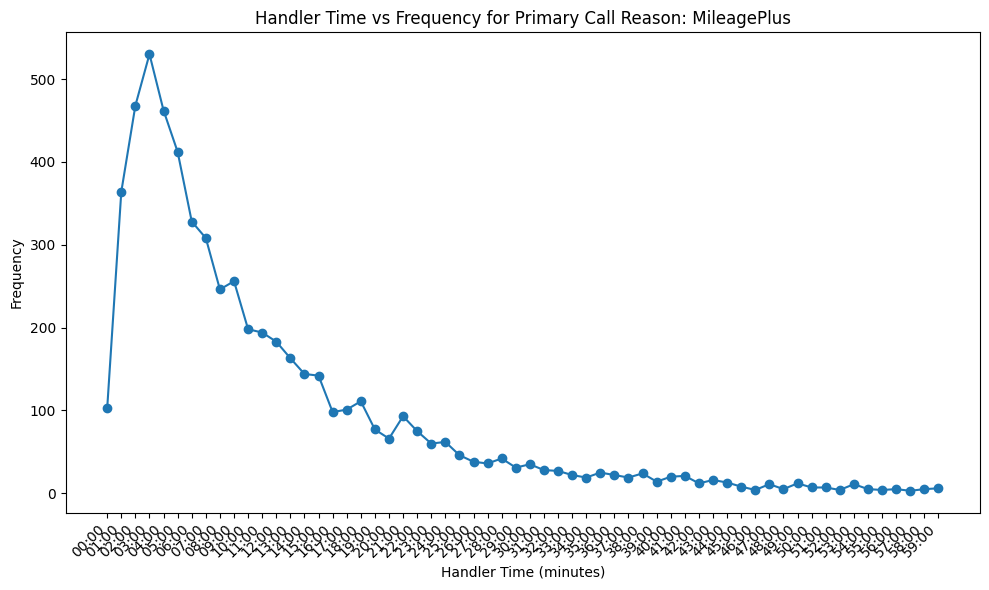

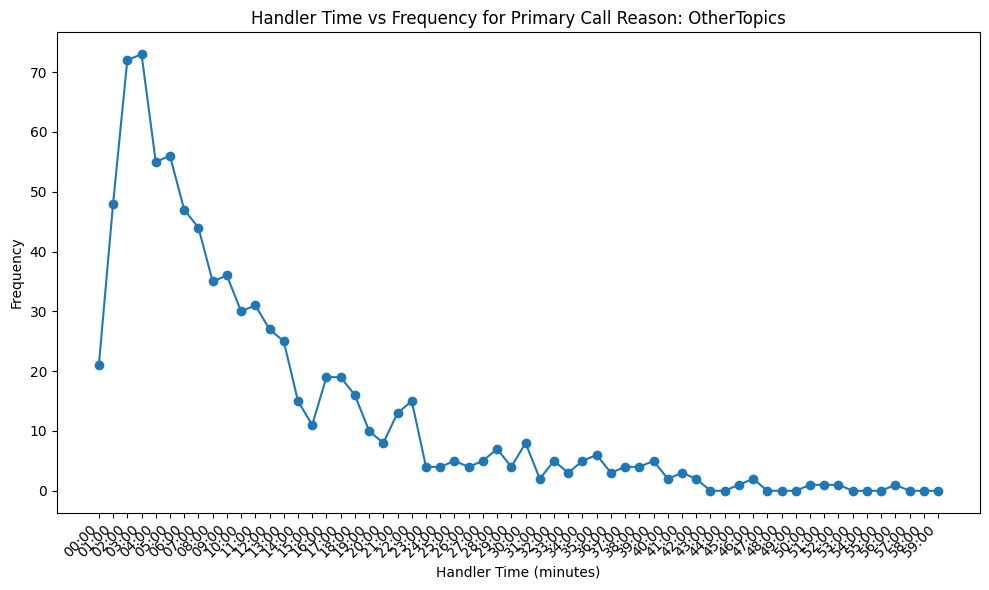

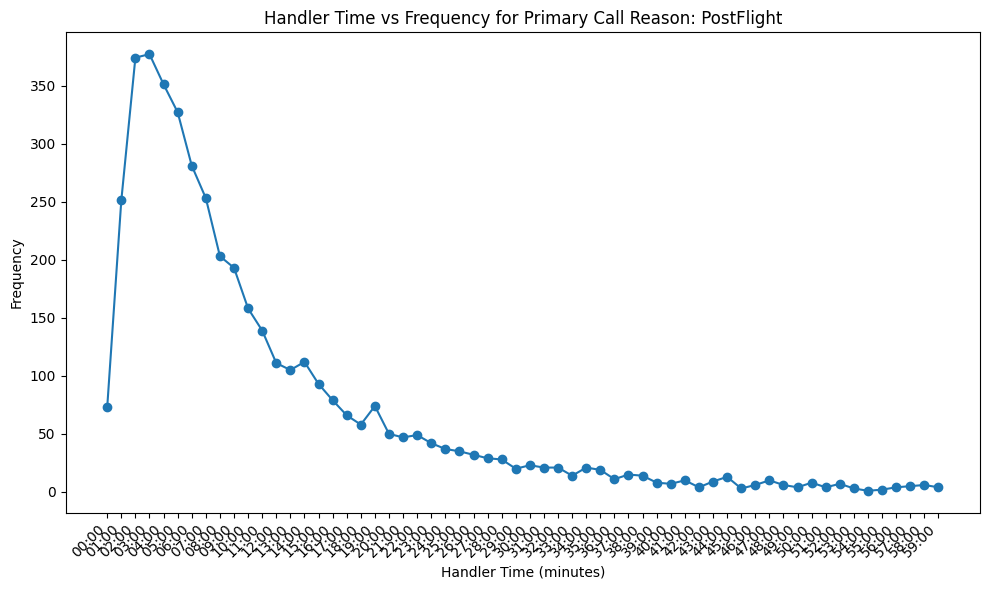

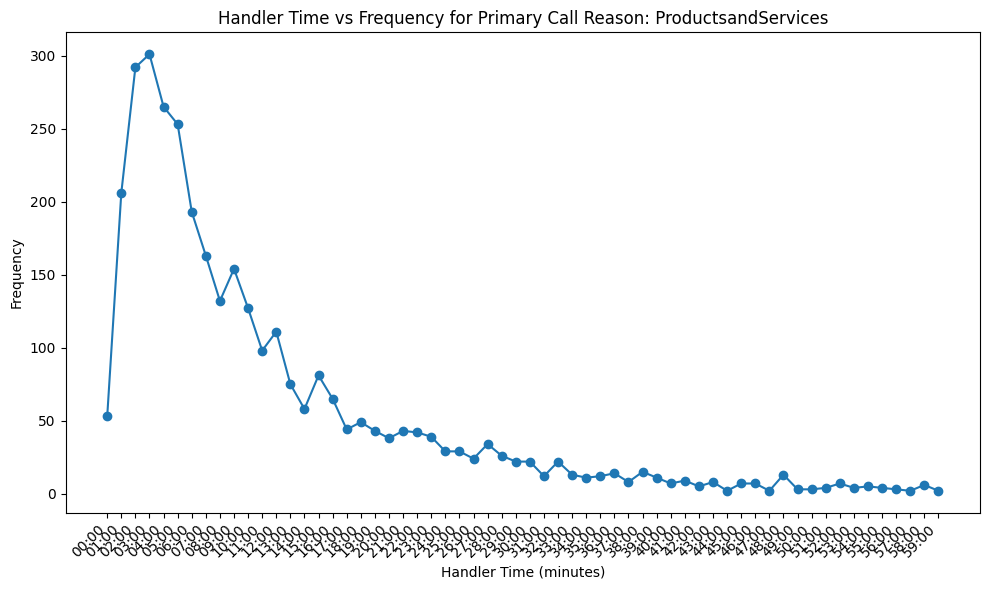

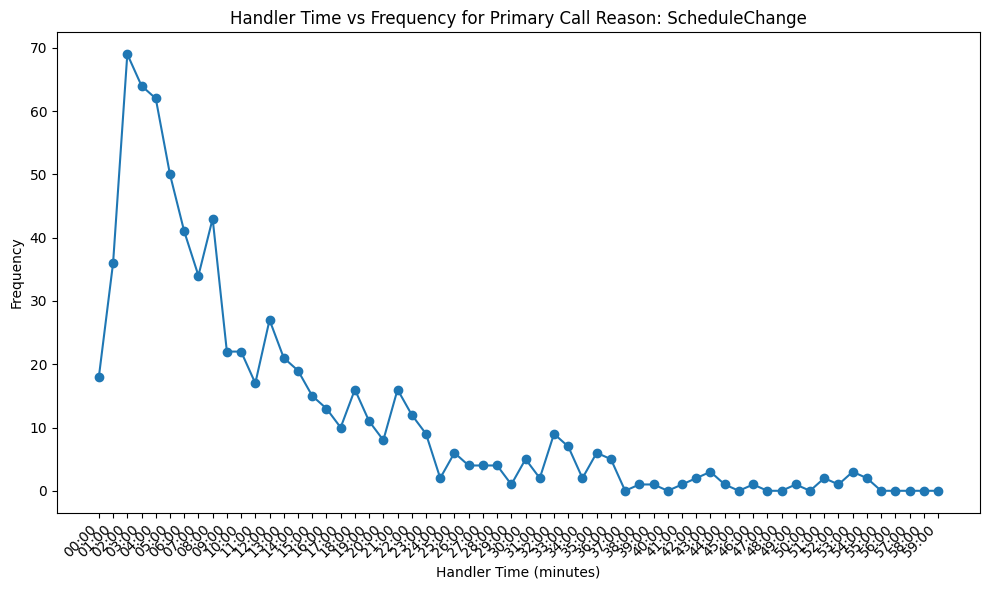

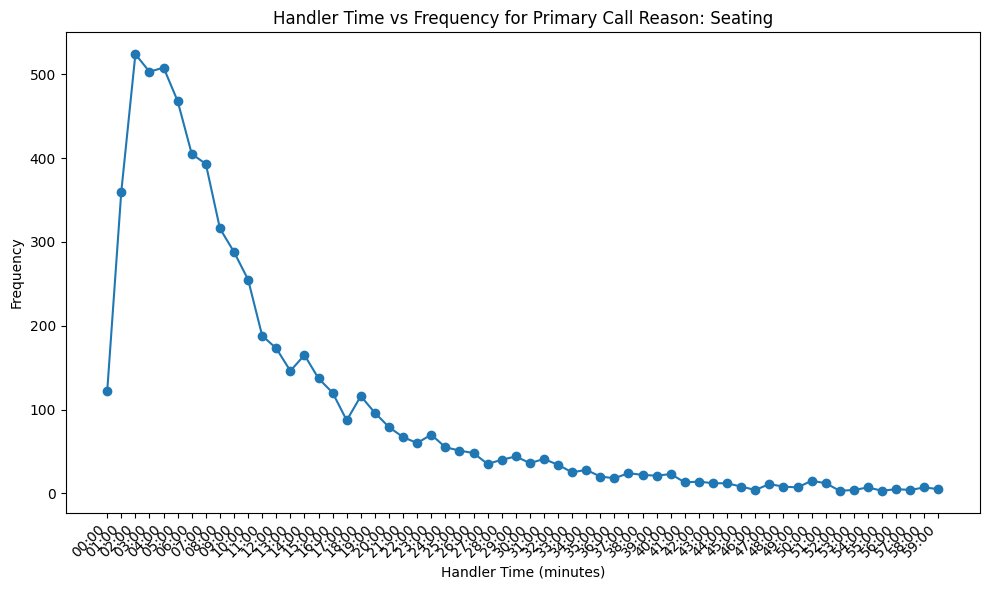

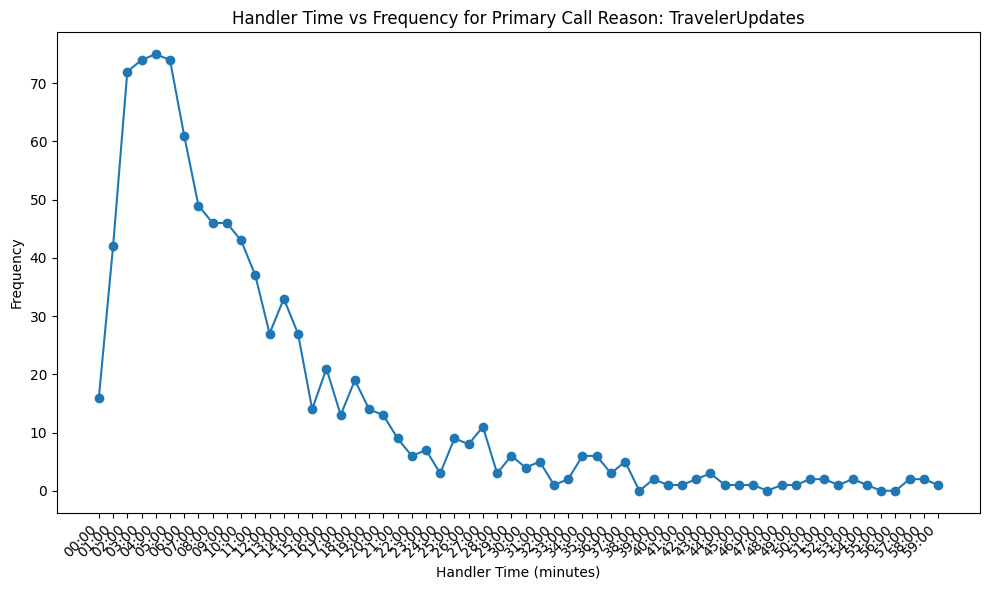

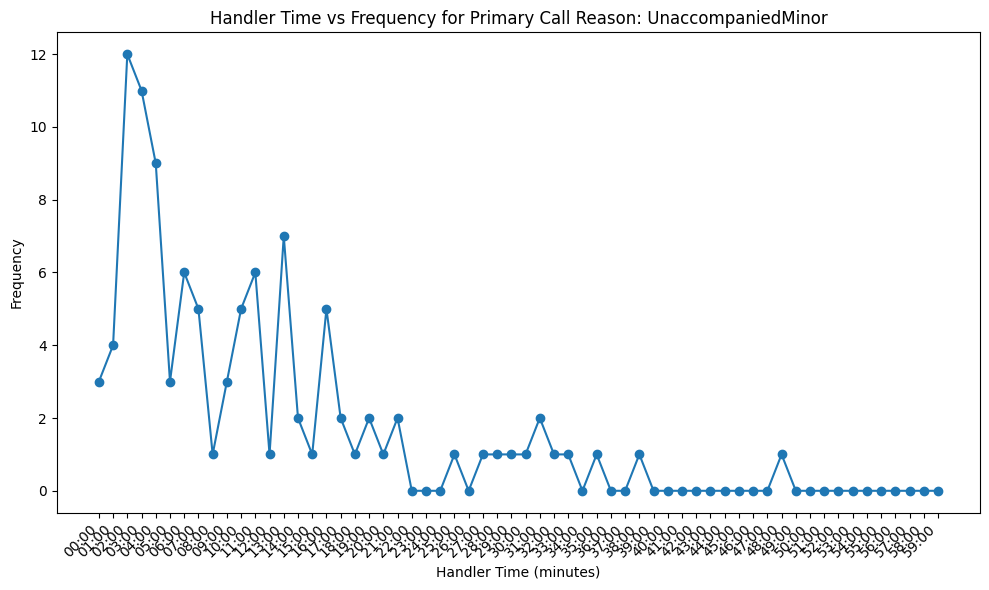

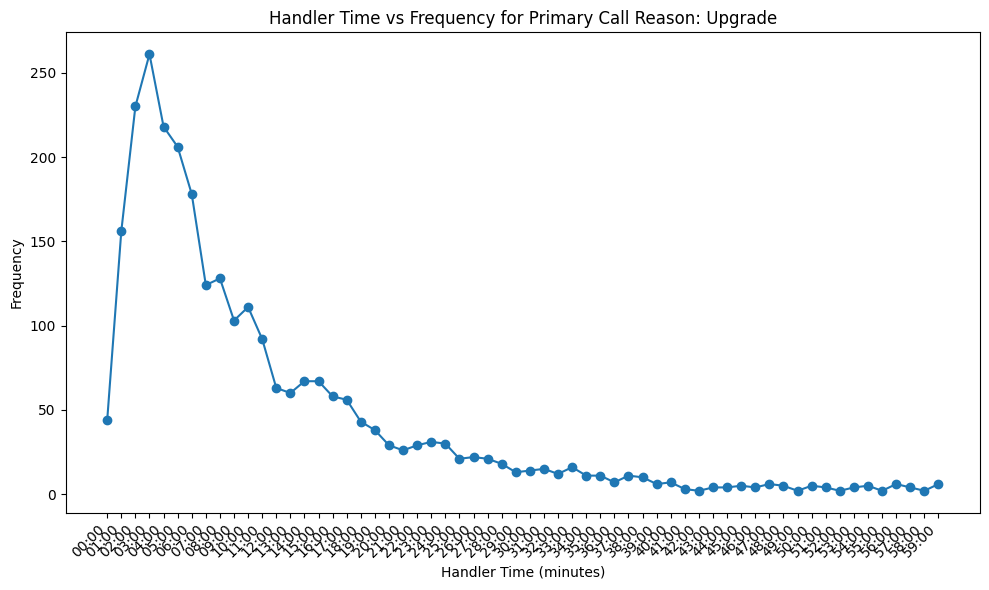

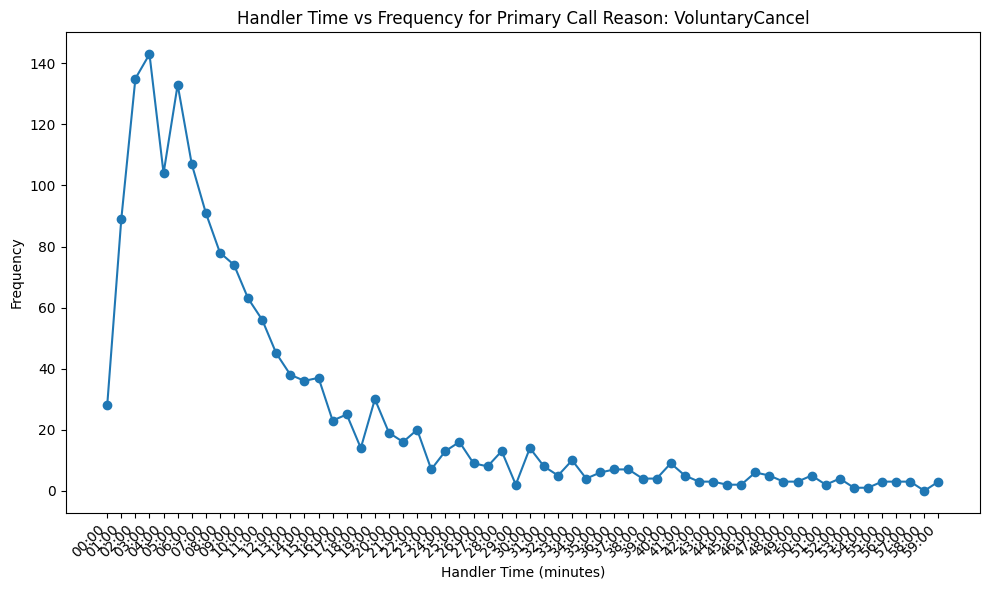

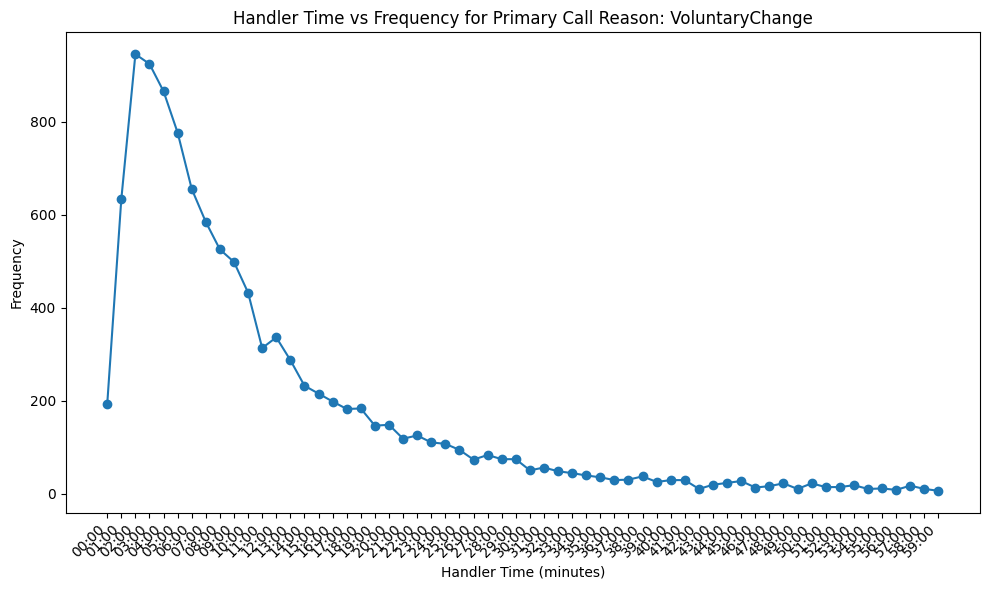

In [29]:
# prompt: now frame a code to plot the handler_time_str vs frequency graph  for each class of primary_call_reason

import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'primary_call_reason' and then count the occurrences of 'handler_time_str' for each group
grouped_data = result_df.groupby('primary_call_reason_y')['Handling_time'].value_counts().unstack().fillna(0)

# Plot the handler time vs frequency graph for each class of primary_call_reason
for reason in grouped_data.index:
  plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
  plt.plot(grouped_data.loc[reason].index, grouped_data.loc[reason].values, marker='o')
  plt.xlabel('Handler Time (Seconds)')
  plt.ylabel('Frequency')
  plt.title(f'Handler Time vs Frequency for Primary Call Reason: {reason}')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent overlapping labels
  plt.show()


<ipython-input-30-cb43c4b58125>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Handling_time_minutes'] = result_df['Handling_time'].apply(convert_time_to_minutes)


                       mode_time  total_time   avg_time
primary_call_reason_y                                  
Baggage                      2.0     30884.0  10.905367
Booking                      3.0     28871.0  10.948426
CheckIn                      2.0     21139.0  11.102416
Checkout                     2.0     20063.0  10.626589
Communications               2.0     42522.0  11.073438
DigitalSupport               3.0     13017.0  10.626122
Disability                   3.0      4322.0  10.724566
ETC                          3.0     10047.0  10.553571
IRROPS                       2.0    144439.0  10.851101
MileagePlus                  3.0     63870.0  10.916083
OtherTopics                  3.0      8679.0  10.610024
PostFlight                   3.0     45580.0  10.526559
ProductsandServices          3.0     36460.0  10.942377
ScheduleChange               2.0      7858.0  10.749658
Seating                      2.0     68421.0  10.749568
TravelerUpdates              4.0     10101.0  10

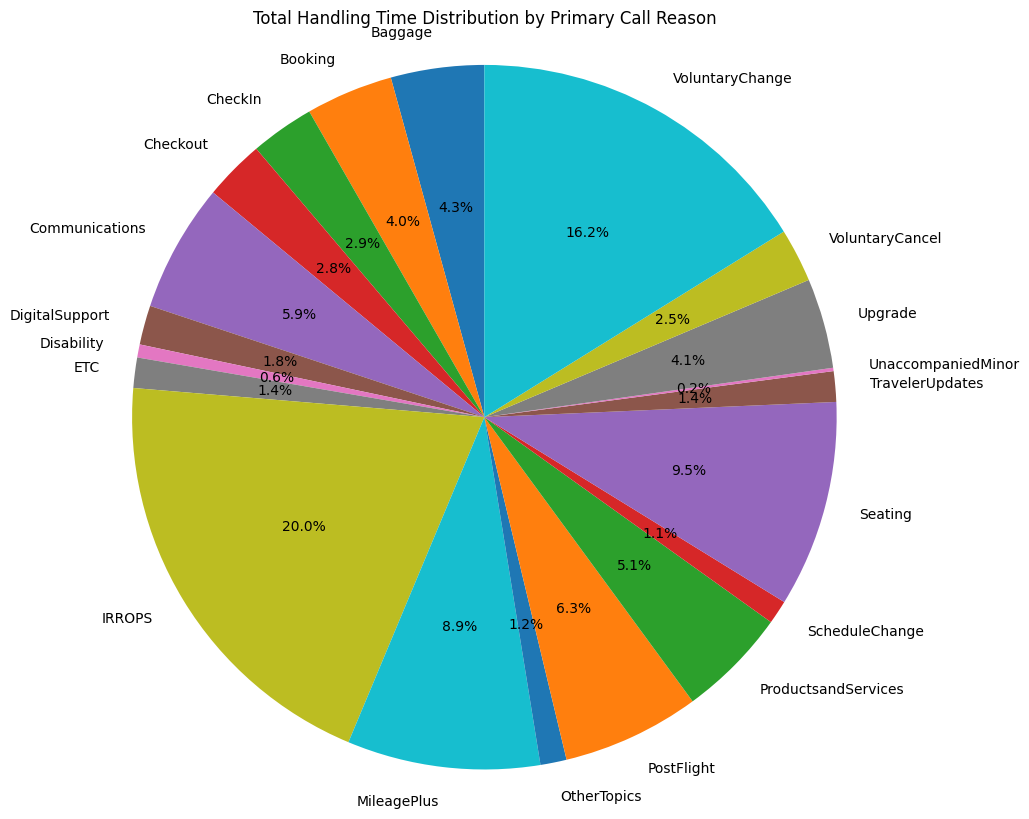

In [30]:
import pandas as pd

# Check if the data in 'Handling_time' is in string format or numeric (assuming 'HH:MM' if string)
def convert_time_to_Seconds(time_str):
    # Check if the value is already numeric (indicating Seconds)
    if isinstance(time_str, str):
        # Convert 'HH:MM' to Seconds
        h, m = map(int, time_str.split(':'))
        return h * 60/60 + m
    return time_str  # Already in Seconds

# Apply the conversion function if needed
result_df['Handling_time_Seconds'] = result_df['Handling_time'].apply(convert_time_to_Seconds)

# Group data by 'primary_call_reason' and calculate required metrics
summary_stats = result_df.groupby('primary_call_reason_y').agg(
    mode_time=('Handling_time_Seconds', lambda x: x.mode()[0]),  # Mode of handling time
    total_time=('Handling_time_Seconds', 'sum'),  # Total handling time
    avg_time=('Handling_time_Seconds', 'mean')    # Average handling time
)

# Display the calculated summary statistics
print(summary_stats)
# Assuming 'summary_stats' is your DataFrame with 'total_time' and 'primary_call_reason'
# If not, please adjust the DataFrame name accordingly.

# Extract the total time and reasons for the pie chart
reasons = summary_stats.index.tolist()
total_times = summary_stats['total_time'].tolist()

# Create the pie chart
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.pie(total_times, labels=reasons, autopct='%1.1f%%', startangle=90)
plt.title('Total Handling Time Distribution by Primary Call Reason')
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()

In [31]:
import pandas as pd
import numpy as np

# Load your dr dataframe and test data (assuming both are in CSV format)
# dr = pd.read_csv('dr.csv')  # This contains the historical data with reasons
test = pd.read_csv('/content/drive/MyDrive/Hackathon 2.0 SkyHack (1)/testbc7185d.csv')  # This contains the caller data for which you want to predict reasons

# Step 1: Calculate the percentage distribution of reasons in the dr dataframe
reason_distribution = dr['primary_call_reason'].value_counts(normalize=True)

# Display the percentage distribution of reasons
print("Reason distribution based on dr data:")
print(reason_distribution)

# Step 2: Predict reasons for callers in test.csv using the reason distribution
# Get the number of rows in the test dataframe
num_callers = len(test)

# Use np.random.choice to randomly assign reasons based on the calculated distribution
predicted_reasons = np.random.choice(
    reason_distribution.index,  # List of possible reasons
    size=num_callers,           # Number of predictions to generate (equal to the number of callers)
    p=reason_distribution.values  # Probabilities corresponding to each reason
)

# Step 3: Add the predicted reasons to the test dataframe
test['Predicted_Reason'] = predicted_reasons

# Step 4: Count occurrences of each predicted reason
reason_counts = test['Predicted_Reason'].value_counts()

# Display the counts of predicted reasons
print("\nCounts of predicted reasons:")
print(reason_counts)

# Display the test dataframe with predicted reasons
print(test)

# Save the result to a new CSV file if needed
test.to_csv('test_with_predicted_reasons.csv', index=False)


Reason distribution based on dr data:
primary_call_reason
IRROPS                 0.199706
VoluntaryChange        0.162753
Seating                0.095495
MileagePlus            0.087783
PostFlight             0.064963
Communications         0.057612
ProductsandServices    0.049990
Baggage                0.042489
Upgrade                0.041078
Booking                0.039563
CheckIn                0.028566
Checkout               0.028326
VoluntaryCancel        0.024110
DigitalSupport         0.018379
ETC                    0.014283
TravelerUpdates        0.014058
OtherTopics            0.012273
ScheduleChange         0.010967
Disability             0.006046
UnaccompaniedMinor     0.001560
Name: proportion, dtype: float64

Counts of predicted reasons:
Predicted_Reason
IRROPS                 1017
VoluntaryChange         822
Seating                 511
MileagePlus             441
PostFlight              370
Communications          299
ProductsandServices     238
Upgrade                 20

In [32]:
# Step 6: Calculate the total estimated handling time for each reason
total_handling_time = reason_counts * summary_stats['avg_time']

# Combine counts and total handling time into a DataFrame
results = pd.DataFrame({
    'Count': reason_counts,
    'Total_Estimated_Handling_Time': total_handling_time
}).fillna(0)  # Fill NaN values with 0 for reasons that may not be present in the test set

# Display the results
print("\nCounts and Total Estimated Handling Time:")
print(results)

# Save the result to a new CSV file if needed
test.to_csv('test_with_predicted_reasons.csv', index=False)


Counts and Total Estimated Handling Time:
                     Count  Total_Estimated_Handling_Time
Baggage                193                    2104.735876
Booking                203                    2222.530527
CheckIn                153                    1698.669643
Checkout               159                    1689.627648
Communications         299                    3310.957813
DigitalSupport          97                    1030.733878
Disability              40                     428.982630
ETC                     71                     749.303571
IRROPS                1017                   11035.569304
MileagePlus            441                    4813.992480
OtherTopics             66                     700.261614
PostFlight             370                    3894.826790
ProductsandServices    238                    2604.285714
ScheduleChange          55                     591.231190
Seating                511                    5493.029222
TravelerUpdates         74   

In [33]:
# Assuming 'results' DataFrame contains 'Total_Estimated_Handling_Time'
# Calculate the overall handling time by summing the 'Total_Estimated_Handling_Time' column
overall_handling_time = results['Total_Estimated_Handling_Time'].sum()

# Print the overall estimated handling time
print(f"Overall Estimated Handling Time: {overall_handling_time:.2f} Seconds")


Overall Estimated Handling Time: 55813.40 minutes



### Estimated Caller Reasons and Handling Time Adjustments

1. **Voluntary Cancel (100 Callers)**:
   - **Convenience**: 20 callers (20%): They prefer the ease of canceling via a chatbot or app instead of calling.
     - **Estimated Handling Time Reduction**: 80% reduction from 665 Seconds → \(20 \times 133 = 2,660\) Seconds saved.
   - **Need Assistance**: 30 callers (30%): They are unsure how to cancel their bookings and need guidance.
     - **Estimated Handling Time Reduction**: 30% reduction → \(30 \times (665 \times 0.7) = 13,345\) Seconds saved.
   - **Refund Status**: 50 callers (50%): They called primarily to check on their refund status.
     - **Estimated Handling Time Reduction**: 40% reduction → \(50 \times (665 \times 0.6) = 19,950\) Seconds saved.
   
   **Total Seconds Saved for Voluntary Cancel**: \(2,660 + 13,345 + 19,950 = 35,955\) Seconds.

2. **Voluntary Change (100 Callers)**:
   - **Convenience**: 10 callers (10%): They find the change process straightforward enough to do via a bot.
     - **Estimated Handling Time Reduction**: 80% → \(10 \times 129.4 = 1,294\) Seconds saved.
   - **Need Assistance**: 30 callers (30%): Require help due to complexity in changes.
     - **Estimated Handling Time Reduction**: 30% → \(30 \times (647 \times 0.7) = 13,613\) Seconds saved.
   - **Last-Minute Changes**: 60 callers (60%): Need to change travel details due to unforeseen circumstances.
     - **Estimated Handling Time Reduction**: 40% → \(60 \times (647 \times 0.6) = 23,247\) Seconds saved.

   **Total Seconds Saved for Voluntary Change**: \(1,294 + 13,613 + 23,247 = 38,154\) Seconds.

3. **Booking (100 Callers)**:
   - **Convenience**: 40 callers (40%): They find online booking more convenient.
     - **Estimated Handling Time Reduction**: 90% → \(40 \times 65 = 2,600\) Seconds saved.
   - **Complex Requests**: 40 callers (40%): Need guidance for multi-leg itineraries.
     - **Estimated Handling Time Reduction**: 50% → \(40 \times (650 \times 0.5) = 13,000\) Seconds saved.
   - **General Inquiries**: 20 callers (20%): General questions about fares or destinations.
     - **Estimated Handling Time Reduction**: 30% → \(20 \times (650 \times 0.7) = 9,100\) Seconds saved.

   **Total Seconds Saved for Booking**: \(2,600 + 13,000 + 9,100 = 24,700\) Seconds.

4. **Seating (100 Callers)**:
   - **Convenience**: 30 callers (30%): Prefer to select seats via an online platform.
     - **Estimated Handling Time Reduction**: 40% → \(30 \times (644 \times 0.6) = 11,544\) Seconds saved.
   - **Need Assistance**: 40 callers (40%): Need help selecting seats for family or friends.
     - **Estimated Handling Time Reduction**: 20% → \(40 \times (644 \times 0.8) = 20,576\) Seconds saved.
   - **Changes on the Day**: 30 callers (30%): Last-minute changes to seating arrangements.
     - **Estimated Handling Time Reduction**: 30% → \(30 \times (644 \times 0.7) = 13,464\) Seconds saved.

   **Total Seconds Saved for Seating**: \(11,544 + 20,576 + 13,464 = 45,584\) Seconds.

5. **MileagePlus (100 Callers)**:
   - **Convenience**: 20 callers (20%): Able to check balances and redeem points via a bot.
     - **Estimated Handling Time Reduction**: 40% → \(20 \times (647 \times 0.6) = 7,764\) Seconds saved.
   - **Need Assistance**: 50 callers (50%): Have questions about point redemption processes.
     - **Estimated Handling Time Reduction**: 30% → \(50 \times (647 \times 0.7) = 22,613\) Seconds saved.
   - **General Inquiries**: 30 callers (30%): General questions about mileage accrual.
     - **Estimated Handling Time Reduction**: 50% → \(30 \times (647 \times 0.5) = 9,705\) Seconds saved.

   **Total Seconds Saved for MileagePlus**: \(7,764 + 22,613 + 9,705 = 40,082\) Seconds.

6. **Traveler Updates (100 Callers)**:
   - **Convenience**: 50 callers (50%): Prefer updates via SMS or email instead of calls.
     - **Estimated Handling Time Reduction**: 90% → \(50 \times 63.1 = 3,155\) Seconds saved.
   - **Need Clarification**: 30 callers (30%): Still prefer clarification despite updates.
     - **Estimated Handling Time Reduction**: 20% → \(30 \times (631 \times 0.8) = 15,168\) Seconds saved.
   - **Special Requests**: 20 callers (20%): Call to make specific inquiries or requests related to travel.
     - **Estimated Handling Time Reduction**: 30% → \(20 \times (631 \times 0.7) = 8,834\) Seconds saved.

   **Total Seconds Saved for Traveler Updates**: \(3,155 + 15,168 + 8,834 = 27,157\) Seconds.

### Summary of Total Estimated Seconds Saved
- **Voluntary Cancel**: 35,955 Seconds
- **Voluntary Change**: 38,154 Seconds
- **Booking**: 24,700 Seconds
- **Seating**: 45,584 Seconds
- **MileagePlus**: 40,082 Seconds
- **Traveler Updates**: 27,157 Seconds

### Conclusion
By analyzing caller motivations and implementing self-service solutions via chatbots or apps, significant time savings can be realized in handling calls. These estimates highlight the potential impact of reducing call handling times through automation, providing both operational efficiencies and enhanced customer experiences.

Would you like to explore further actions or analyses based on these findings?

In [34]:

# Step 5: Define the percentage reductions for each reason
reductions = {
    "Baggage": 0.25,
    "Booking": 0.90,
    "CheckIn": 0.30,
    "Checkout": 0.20,
    "Communications": 0.10,
    "DigitalSupport": 0.50,
    "Disability": 0.10,
    "ETC": 0.20,
    "IRROPS": 0.20,
    "MileagePlus": 0.40,
    "OtherTopics": 0.10,
    "PostFlight": 0.20,
    "ProductsandServices": 0.10,
    "ScheduleChange": 0.10,
    "Seating": 0.40,
    "TravelerUpdates": 0.90,
    "UnaccompaniedMinor": 0.80,
    "Upgrade": 0.60,
    "VoluntaryCancel": 0.90,
    "VoluntaryChange": 0.50,
}

# Step 6: Adjust the reason counts based on the reductions
adjusted_counts = reason_counts.copy()  # Copy original counts to adjust

for reason, reduction in reductions.items():
    if reason in adjusted_counts.index:
        adjusted_counts[reason] *= (1 - reduction)

# Display the adjusted counts of predicted reasons
print("\nAdjusted counts of predicted reasons after reduction:")
print(adjusted_counts)



Adjusted counts of predicted reasons after reduction:
Predicted_Reason
IRROPS                 813.60
VoluntaryChange        411.00
Seating                306.60
MileagePlus            264.60
PostFlight             296.00
Communications         269.10
ProductsandServices    214.20
Upgrade                 82.80
Booking                 20.30
Baggage                144.75
Checkout               127.20
CheckIn                107.10
VoluntaryCancel         13.30
DigitalSupport          48.50
TravelerUpdates          7.40
ETC                     56.80
OtherTopics             59.40
ScheduleChange          49.50
Disability              36.00
UnaccompaniedMinor       1.60
Name: count, dtype: float64


<ipython-input-34-5fb533f7f368>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '144.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adjusted_counts[reason] *= (1 - reduction)


In [35]:
# Step 6: Calculate the total estimated handling time for each reason
total_handling_time = adjusted_counts * summary_stats['avg_time']

# Combine counts and total handling time into a DataFrame
results = pd.DataFrame({
    'Count': adjusted_counts,
    'Total_Estimated_Handling_Time': total_handling_time
}).fillna(0)  # Fill NaN values with 0 for reasons that may not be present in the test set

# Display the results
print("\nCounts and Total Estimated Handling Time:")
print(results)

# Save the result to a new CSV file if needed
test.to_csv('test_with_predicted_reasons.csv', index=False)


Counts and Total Estimated Handling Time:
                      Count  Total_Estimated_Handling_Time
Baggage              144.75                    1578.551907
Booking               20.30                     222.253053
CheckIn              107.10                    1189.068750
Checkout             127.20                    1351.702119
Communications       269.10                    2979.862031
DigitalSupport        48.50                     515.366939
Disability            36.00                     386.084367
ETC                   56.80                     599.442857
IRROPS               813.60                    8828.455443
MileagePlus          264.60                    2888.395488
OtherTopics           59.40                     630.235452
PostFlight           296.00                    3115.861432
ProductsandServices  214.20                    2343.857143
ScheduleChange        49.50                     532.108071
Seating              306.60                    3295.817533
TravelerUpdat

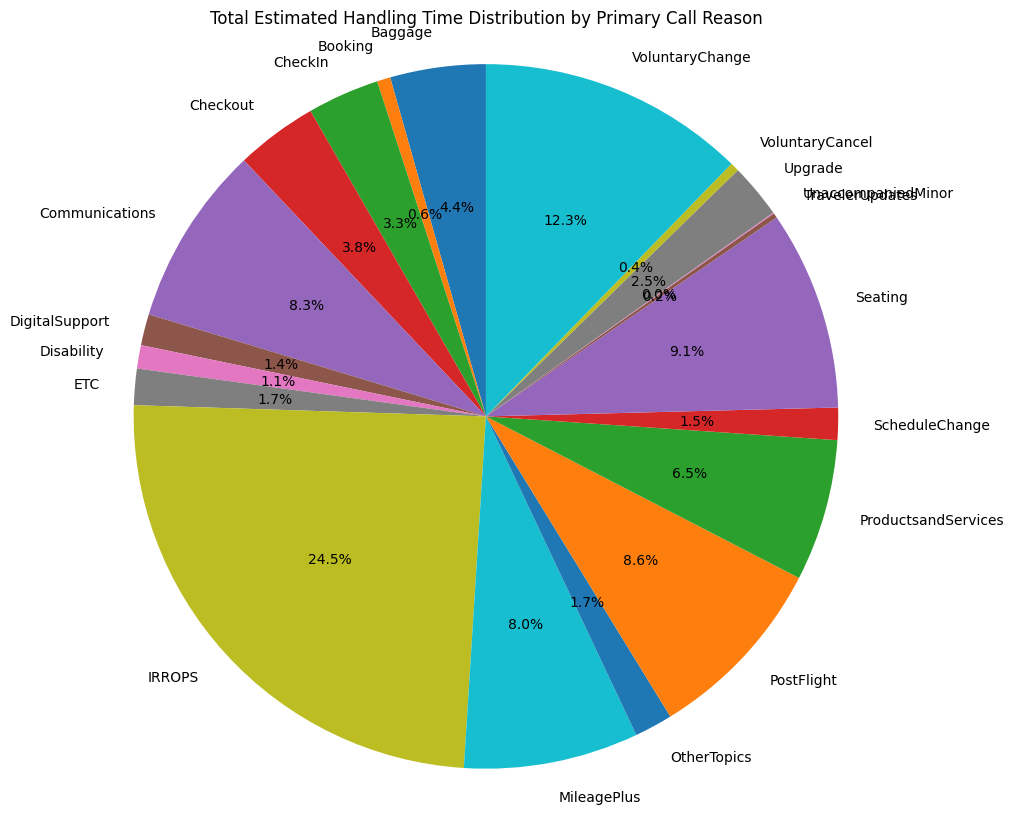

In [36]:

reasons = results.index.tolist()
total_times = results['Total_Estimated_Handling_Time'].tolist()

# Create the pie chart
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.pie(total_times, labels=reasons, autopct='%1.1f%%', startangle=90)
plt.title('Total Estimated Handling Time Distribution by Primary Call Reason')
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()


In [37]:
# Assuming 'results' is a DataFrame with a column named 'Total_Estimated_Handling_Time'
# Calculate the total estimated handling time directly from the DataFrame
total_sum = results['Total_Estimated_Handling_Time'].sum()

# Display the grand total of estimated handling time
print(f"\nTotal Estimated Handling Time across all reasons: {total_sum:.2f} Seconds")



Total Estimated Handling Time across all reasons: 36021.68 minutes


In [38]:

# Calculate the total number of original calls
total_original_calls = reason_counts.sum()

# Calculate the total number of adjusted calls
total_adjusted_calls = adjusted_counts.sum()

# Calculate the overall deduction of calls
overall_deduction_per = (total_original_calls - total_adjusted_calls) / total_original_calls * 100
overall_deduction = (total_original_calls - total_adjusted_calls)
# Print the overall deduction of calls
print(f"\nOverall deduction of calls for test.csv: {overall_deduction_per:.2f}%")
print(f"\nOverall deduction of calls for test.csv:", int(overall_deduction))



Overall deduction of calls for test.csv: 35.43%

Overall deduction of calls for test.csv: 1827


In [39]:
# Convert the waiting_time_mean to a timedelta object if it isn't already
waiting_time_seconds = waiting_time_mean.total_seconds()

# Now calculate the total time saved by multiplying the overall deduction with the waiting time in seconds
total_time_saved = overall_deduction * waiting_time_seconds/60

# Print the result
print(f"Total time saved: {total_time_saved} Seconds")


Total time saved: 8657.032613216668 minutes


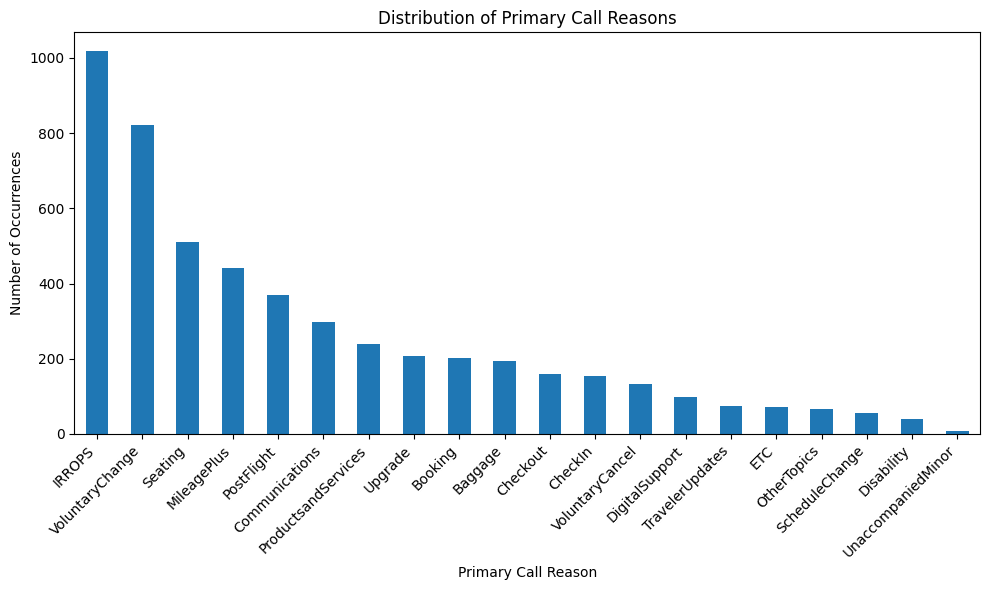

In [40]:

import matplotlib.pyplot as plt

# Assuming 'reason_counts' is the pandas Series containing the counts for each reason
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
reason_counts.plot(kind='bar')
plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Primary Call Reasons')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


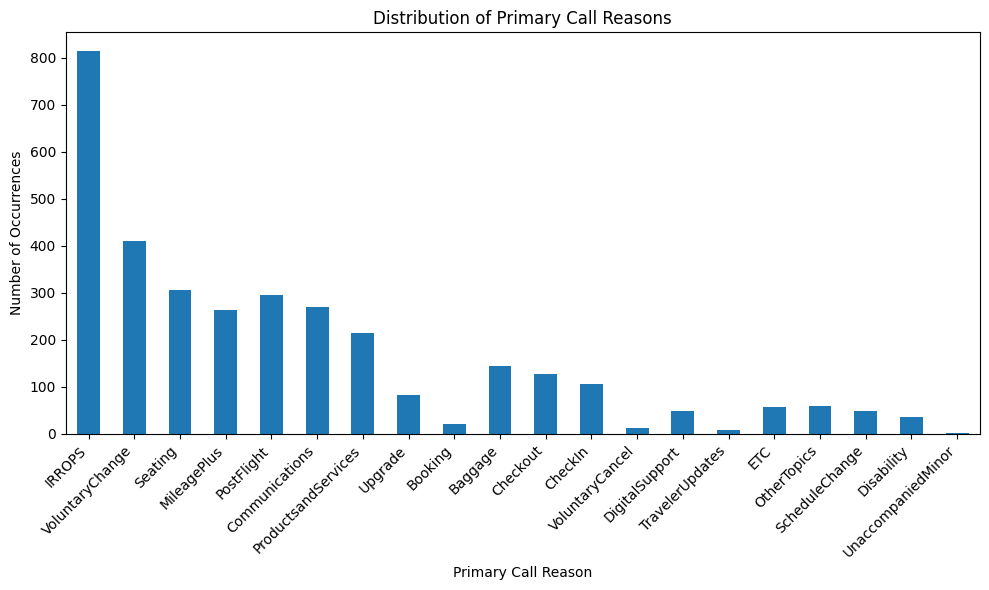

In [41]:

import matplotlib.pyplot as plt

# Assuming 'reason_counts' is the pandas Series containing the counts for each reason
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
adjusted_counts.plot(kind='bar')
plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Primary Call Reasons')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


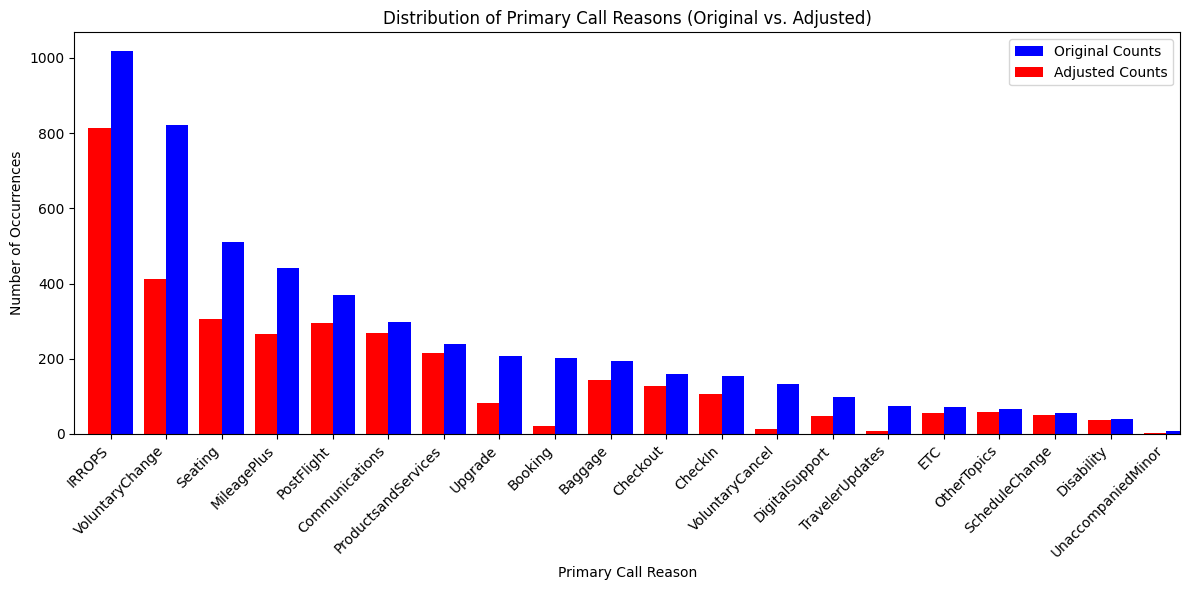

In [43]:

# ... (Your existing code) ...
# Assuming 'reason_counts' and 'adjusted_counts' are your pandas Series
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot reason_counts in blue
reason_counts.plot(kind='bar', color='blue', width=0.4, position=0, label='Original Counts')

# Plot adjusted_counts in red, slightly shifted to the right
adjusted_counts.plot(kind='bar', color='red', width=0.4, position=1, label='Adjusted Counts')

plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Primary Call Reasons (Original vs. Adjusted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend for the two bars
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
